# Get Data and data split

In [9]:
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('Data/train_cluster.csv')
X,y = data.drop('diagnosed_diabetes', axis=1), data['diagnosed_diabetes']

x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

x_train

,Unnamed: 0,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,cholesterol_total,family_history_diabetes,gender_Female,ethnicity_Asian,education_level_Graduate,income_level_Low,smoking_status_Current,employment_status_Employed
198471,198471,51,3,49,4.2,8.6,217,0,0,0,0,0,0,1
246164,246164,36,2,119,3.8,7.3,181,0,1,0,1,0,1,0
189988,189988,45,1,46,3.1,8.5,167,0,1,0,0,0,0,1
157580,157580,63,1,94,6.7,7.1,180,0,1,0,0,0,0,1
643671,643671,36,1,62,6.5,7.5,178,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677183,677183,37,2,58,6.1,6.6,163,0,0,0,0,1,1,1
680755,680755,69,2,115,6.0,8.4,196,1,1,0,1,0,0,1
206327,206327,41,2,73,5.8,6.8,181,0,0,1,0,0,0,1
691444,691444,55,3,52,5.6,7.2,181,0,0,0,0,0,0,1


# Metric function

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    184585
         1.0       1.00      1.00      1.00    305415

    accuracy                           1.00    490000
   macro avg       1.00      1.00      1.00    490000
weighted avg       1.00      1.00      1.00    490000



{'accuracy': 1.0, 'roc_score': 1.0}

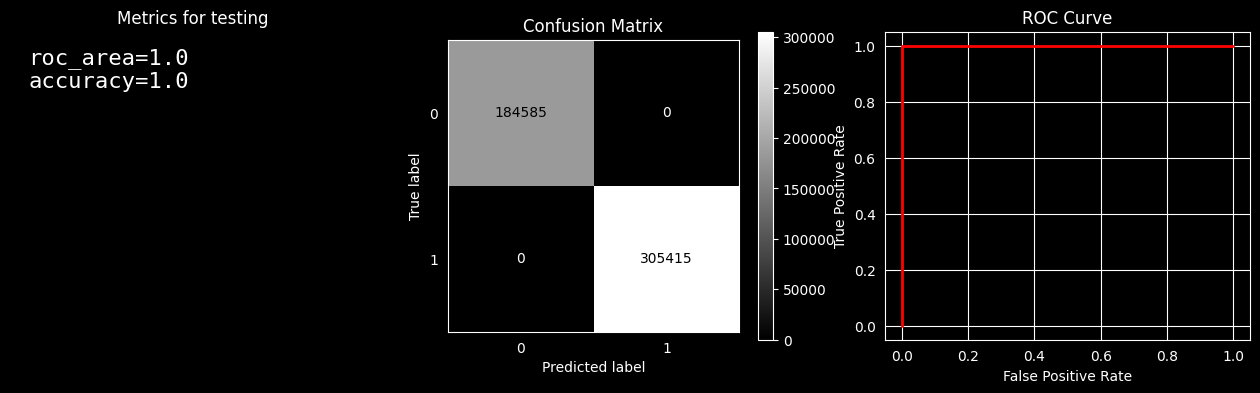

In [11]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")